In [1]:
%matplotlib notebook
import lightkurve as lk
import matplotlib.pyplot as plt
import scipy
lcflist = lk.search_lightcurvefile('TIC 150437899').download_all()

<IPython.core.display.Javascript object>


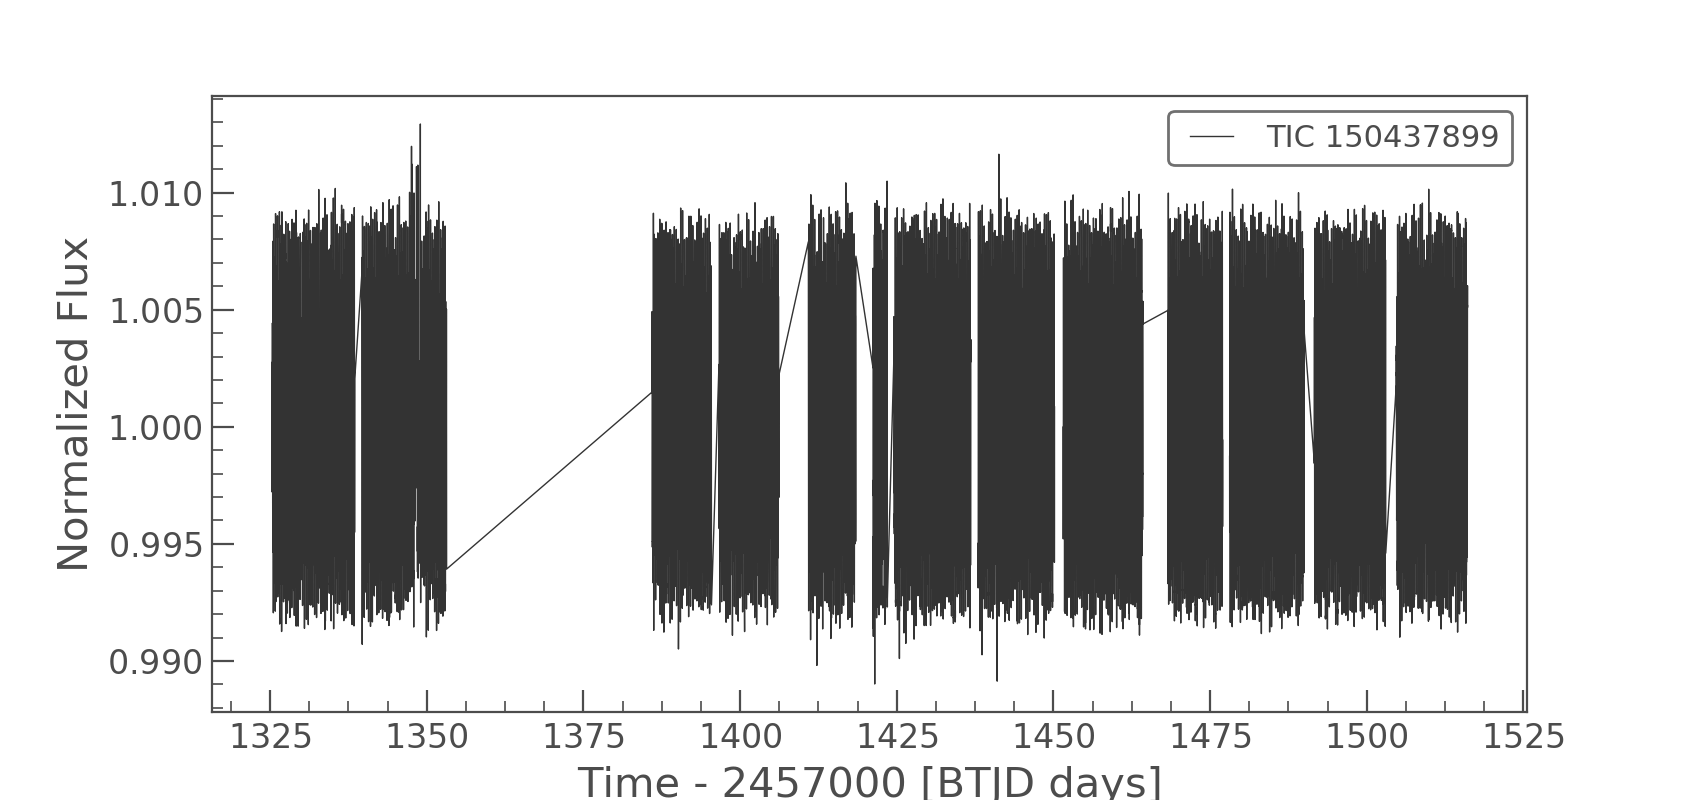

In [2]:
lc = lcflist[0].PDCSAP_FLUX.normalize().flatten(window_length=201,break_tolerance=10)
for value in lcflist[1:]:
    lc = lc.append(value.PDCSAP_FLUX.normalize().flatten(window_length=201,break_tolerance=10))
    
lc.plot()

<IPython.core.display.Javascript object>


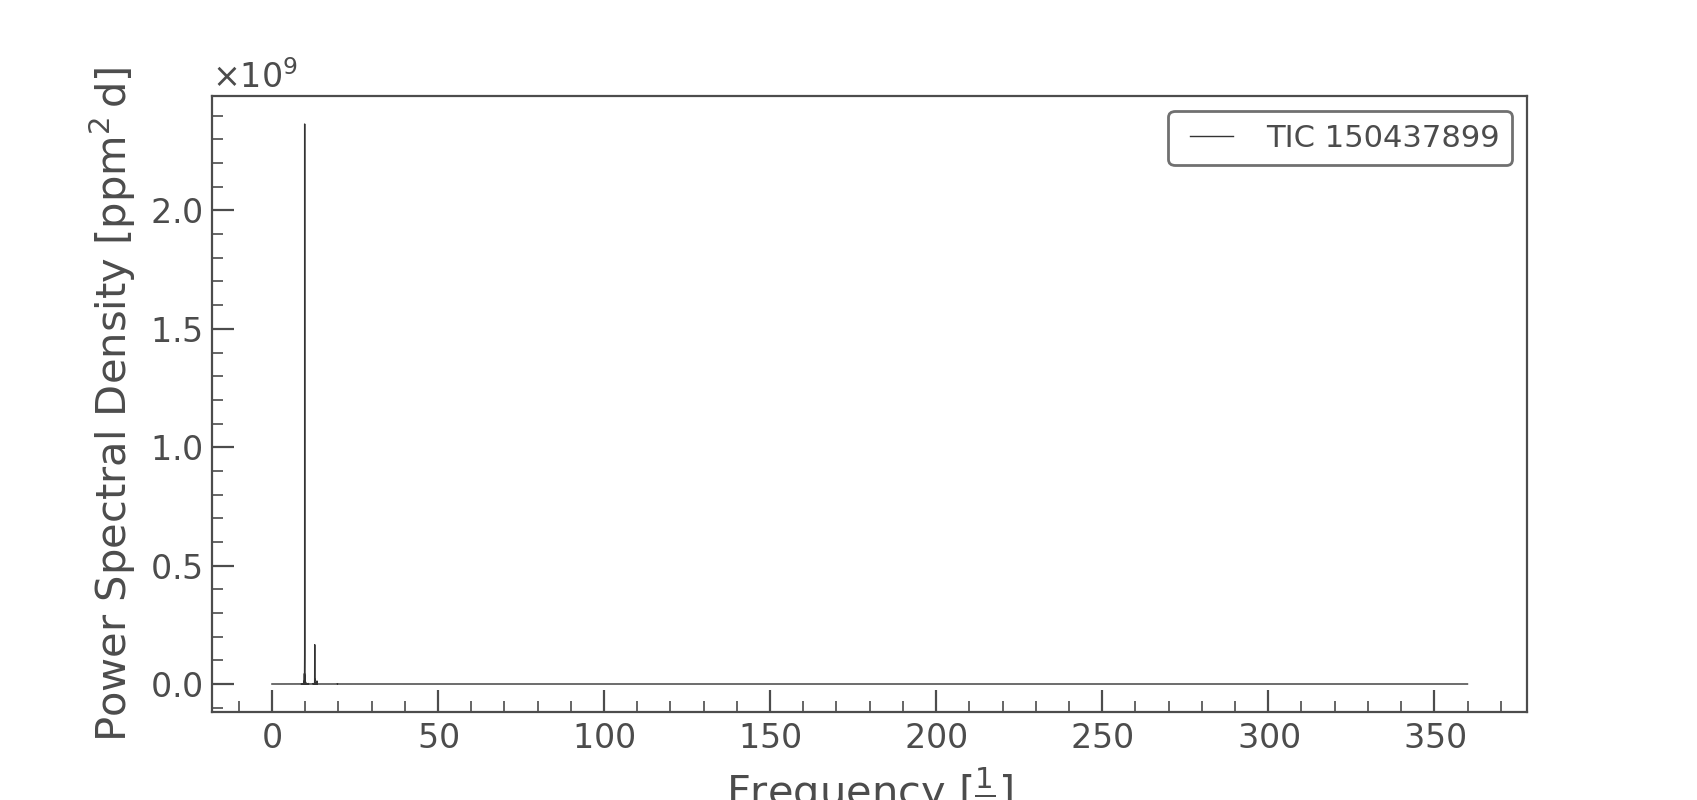

<IPython.core.display.Javascript object>


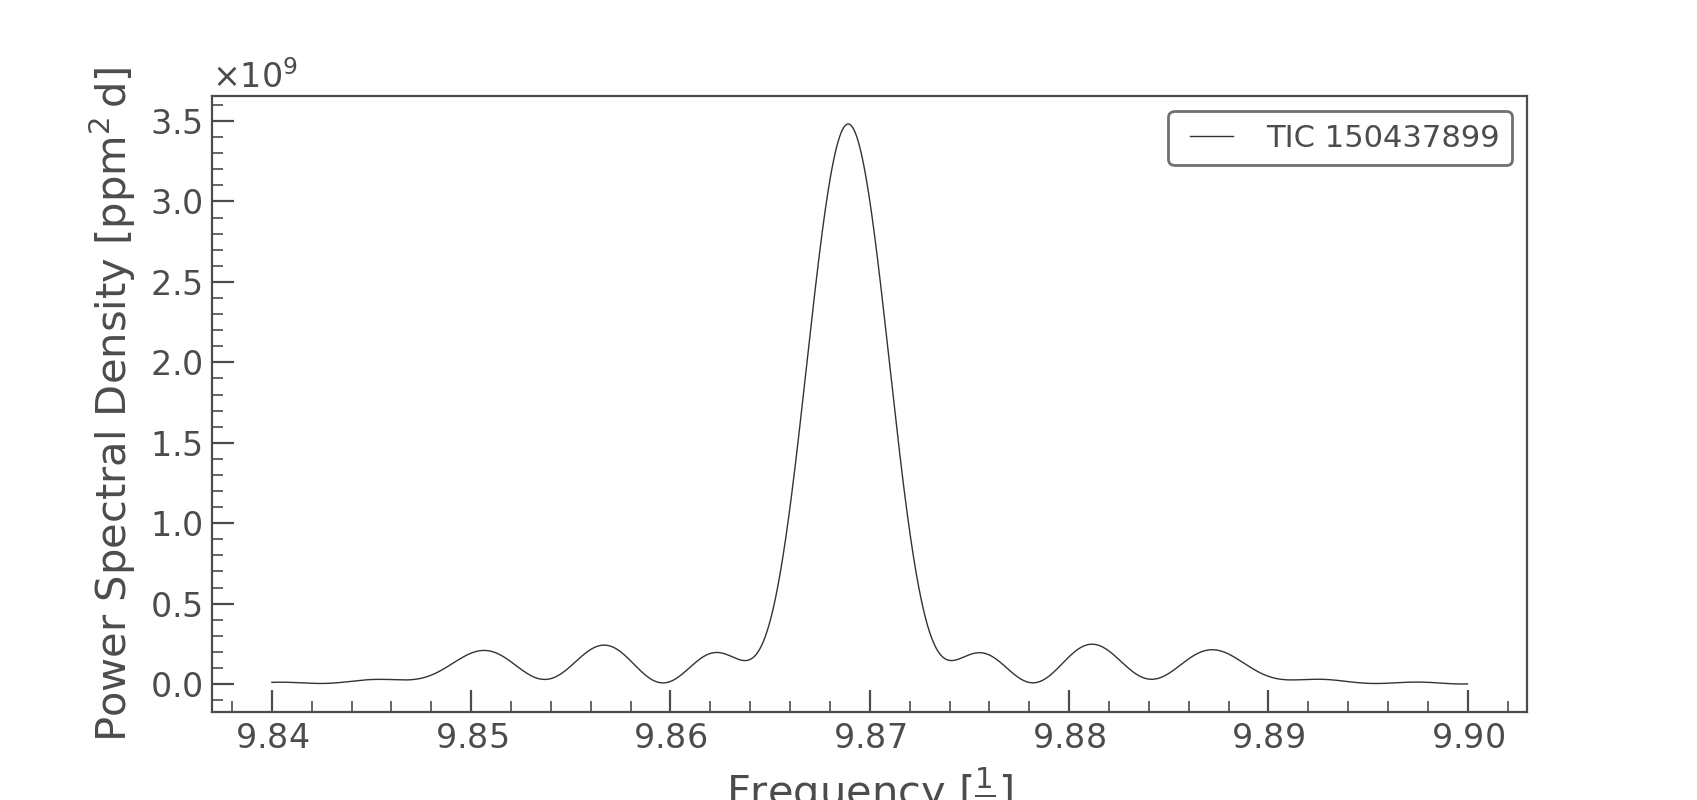

<IPython.core.display.Javascript object>


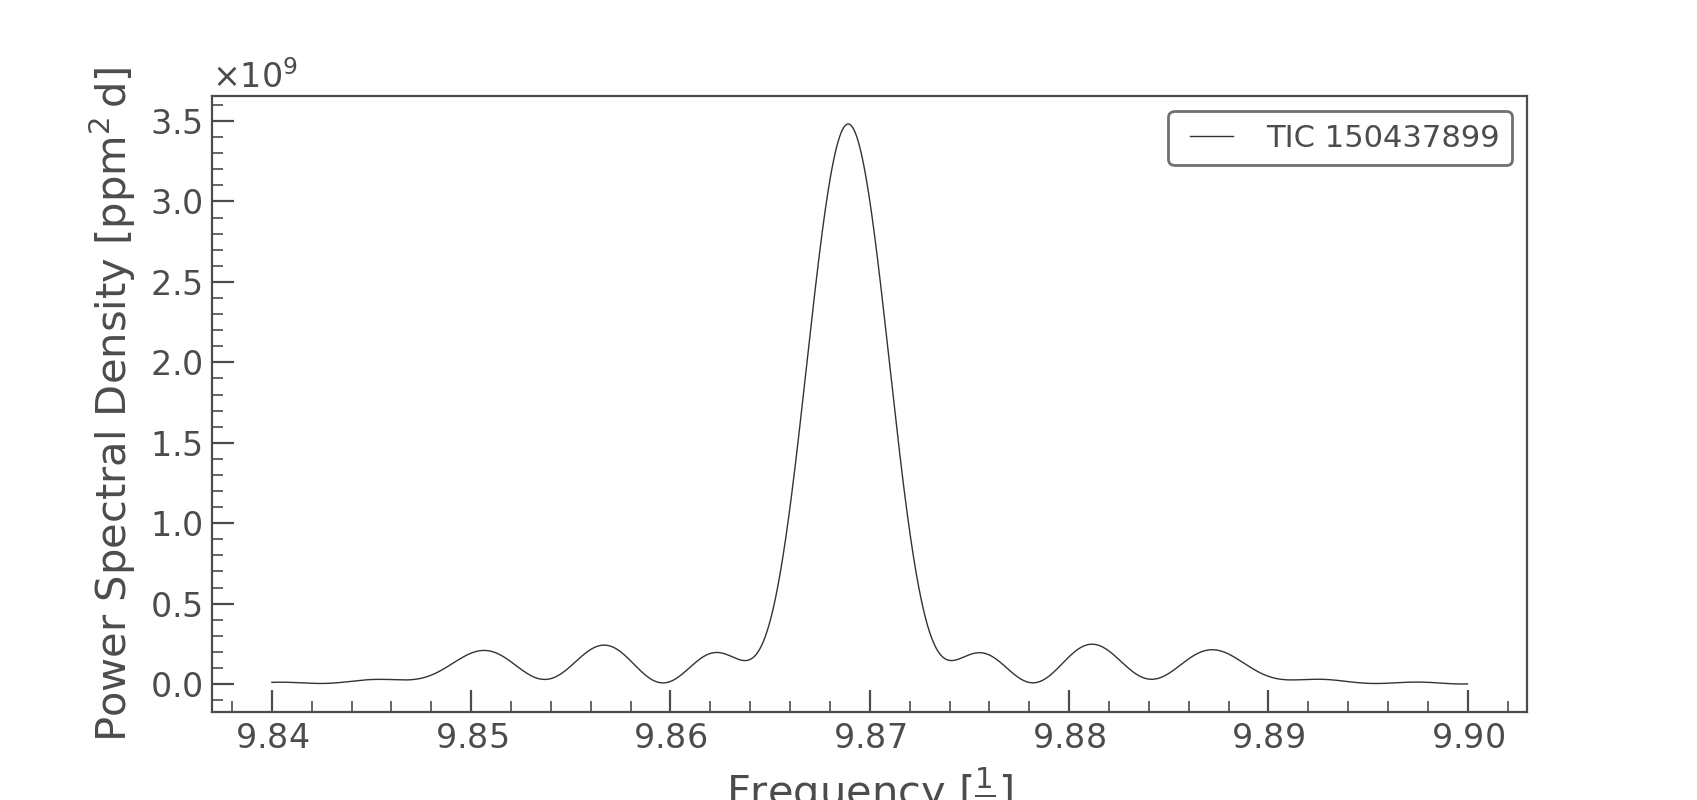

In [12]:
pg1 = lc.remove_nans().to_periodogram()
pg1.plot()
pg = lc.remove_nans().to_periodogram(min_frequency = 9.84, max_frequency = 9.9, oversample_factor = 500, nyquist_factor = 4)
pg.plot()
pg2 = lc.remove_nans().to_periodogram(min_frequency = 13.55, max_frequency = 13.6, oversample_factor = 500, nyquist_factor = 4)
pg.plot()

<IPython.core.display.Javascript object>


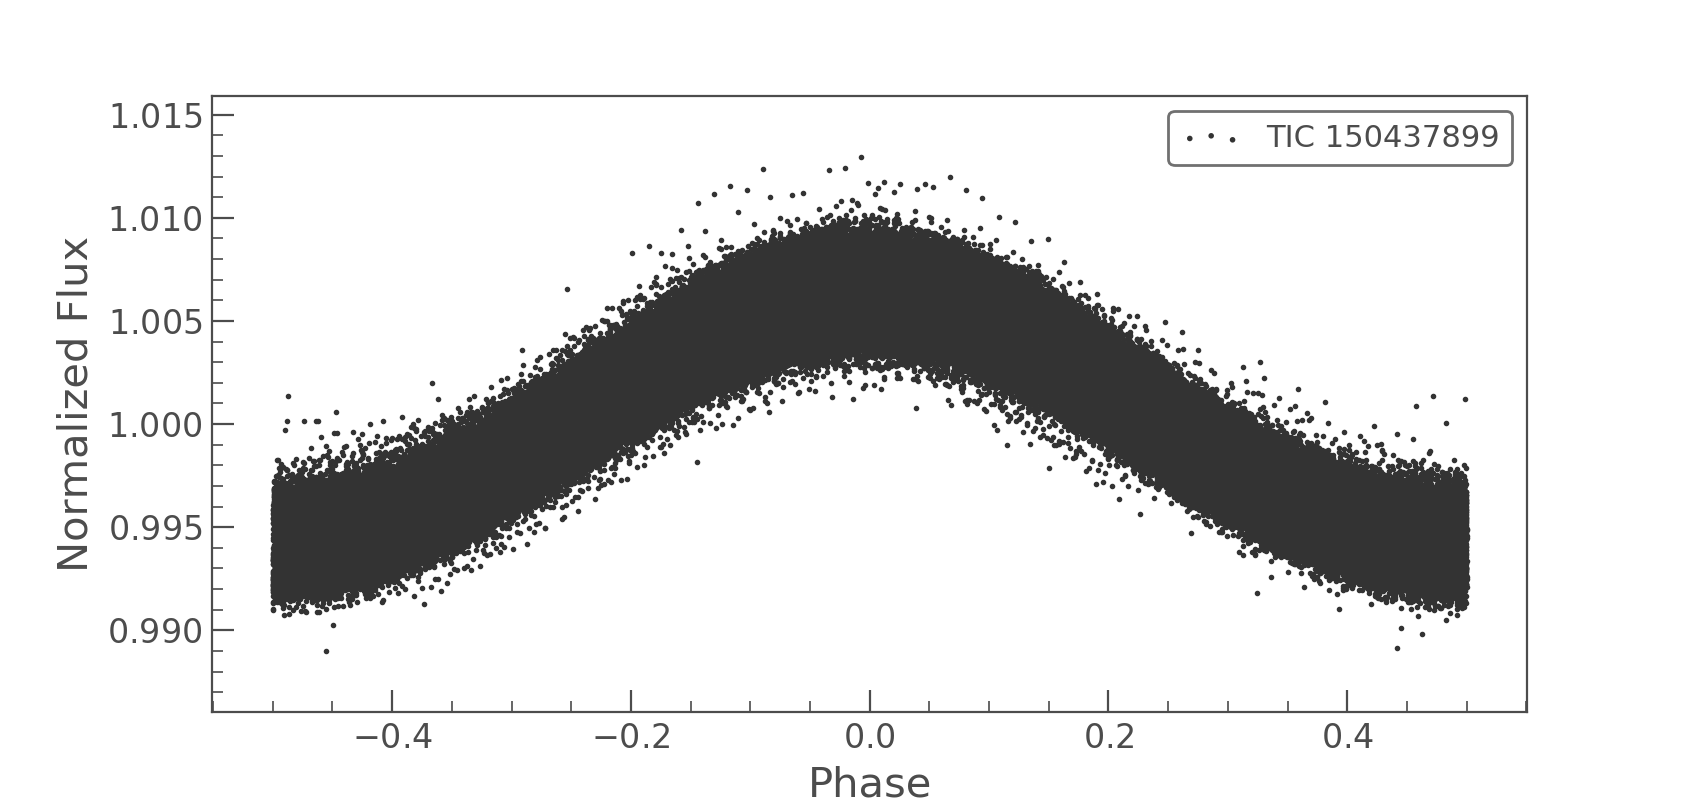

In [16]:
lc.fold(pg.period_at_max_power.value).scatter()
freq=pg.frequency_at_max_power.value

<IPython.core.display.Javascript object>


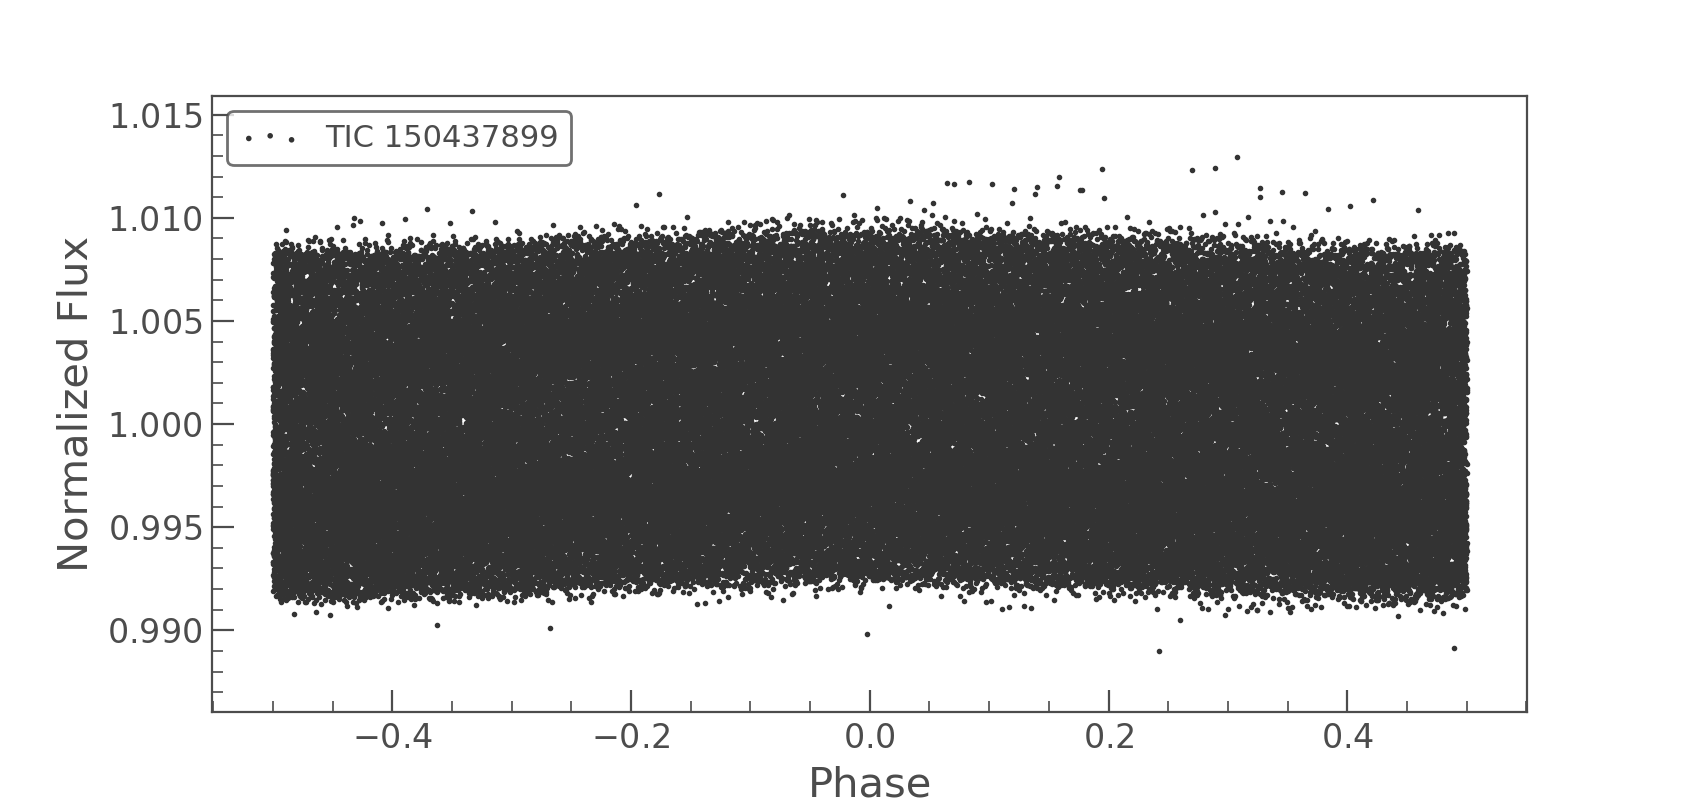

In [17]:
lc.fold(pg2.period_at_max_power.value).scatter()
freq2=pg2.frequency_at_max_power.value

In [14]:
def divide_chunks(l, n): 
  
    # looping till length l 
    for i in range(0, len(l), n):  
        yield l[i:i + n]

In [15]:
def sinfunc(t,p, A):  return A * np.sin(2.*np.pi*freq*(t + p)) + 1.0
print(freq)

def sumofsins(t,p1,A1,p2,A2): return sinfunc(p1,A1)+sinfunc(p2,A2)

13.570451729294753


<IPython.core.display.Javascript object>


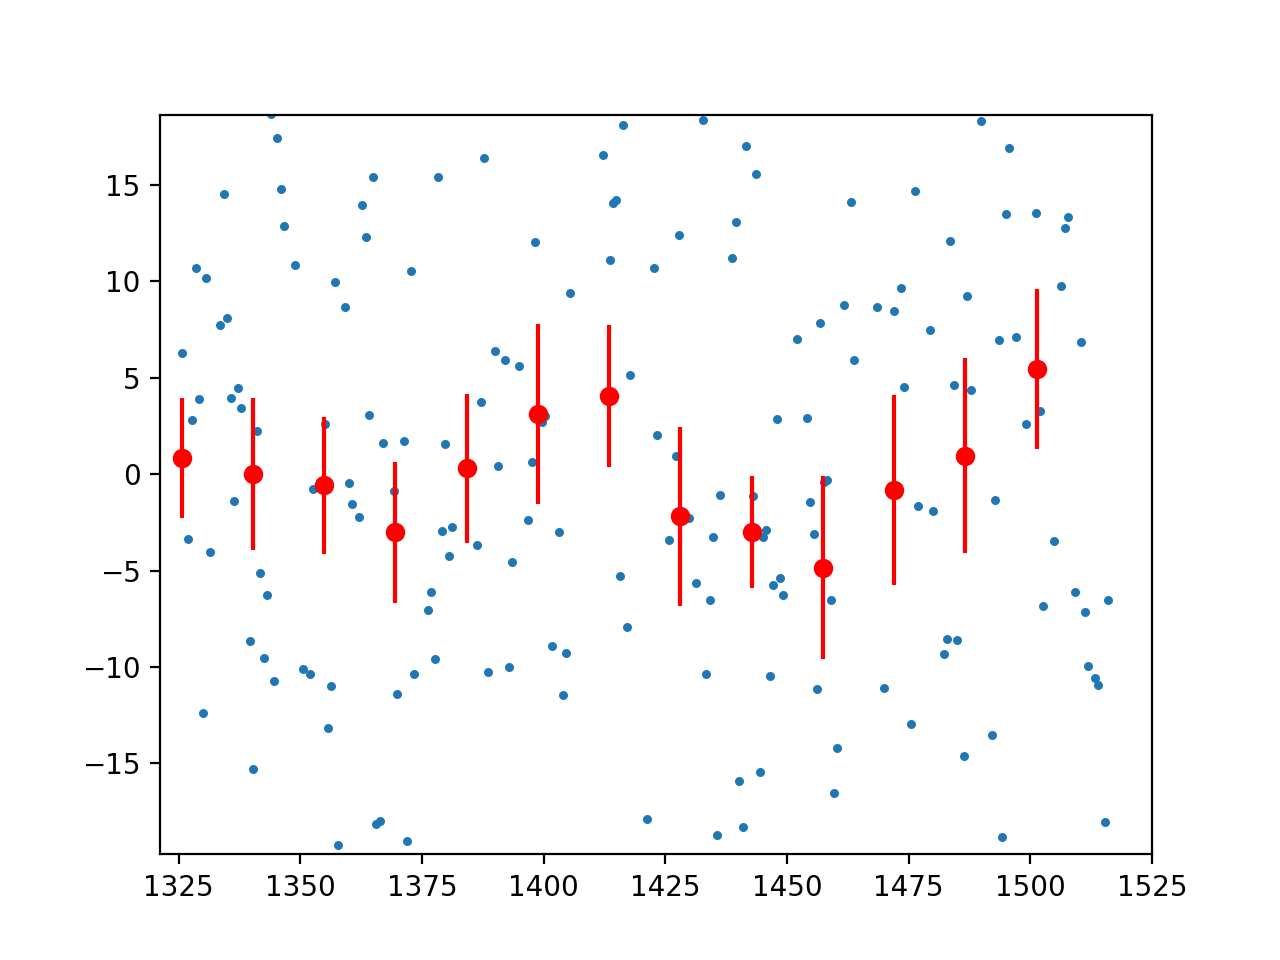

<ErrorbarContainer object of 3 artists>

In [18]:
import numpy as np
lc = lc.remove_nans()
guess_amp = np.std(lc.flux) * 2.**0.5
num_sections = 500
time = list(divide_chunks(lc.time,num_sections))
flux = list(divide_chunks(lc.flux,num_sections))
import numpy as np
periodlist = []
mediantimelist = []
#iterate over every window
for index, interval in enumerate(time):
    guess = np.array([1325.31,guess_amp])
    popt, pcov = scipy.optimize.curve_fit(sinfunc, interval, flux[index], p0=guess)
    periodlist.append(popt[0])
    mediantimelist.append(np.median(interval))
fig = plt.figure()
ax = fig.add_subplot(111)

arr = scipy.stats.binned_statistic(mediantimelist, periodlist, 'mean', bins=13)
arr1 = scipy.stats.binned_statistic(mediantimelist, periodlist, np.std, bins=13)

ax.scatter(np.array(mediantimelist),86400*(np.array(periodlist)-np.mean(periodlist)),s=5)
ax.errorbar(arr[1][0:-1],(np.array(arr[0])-np.mean(periodlist))*86400,yerr = (arr1[0]*86400.0)/np.sqrt(arr[1][1]-arr[1][0]),fmt = 'o', c='red')

<IPython.core.display.Javascript object>


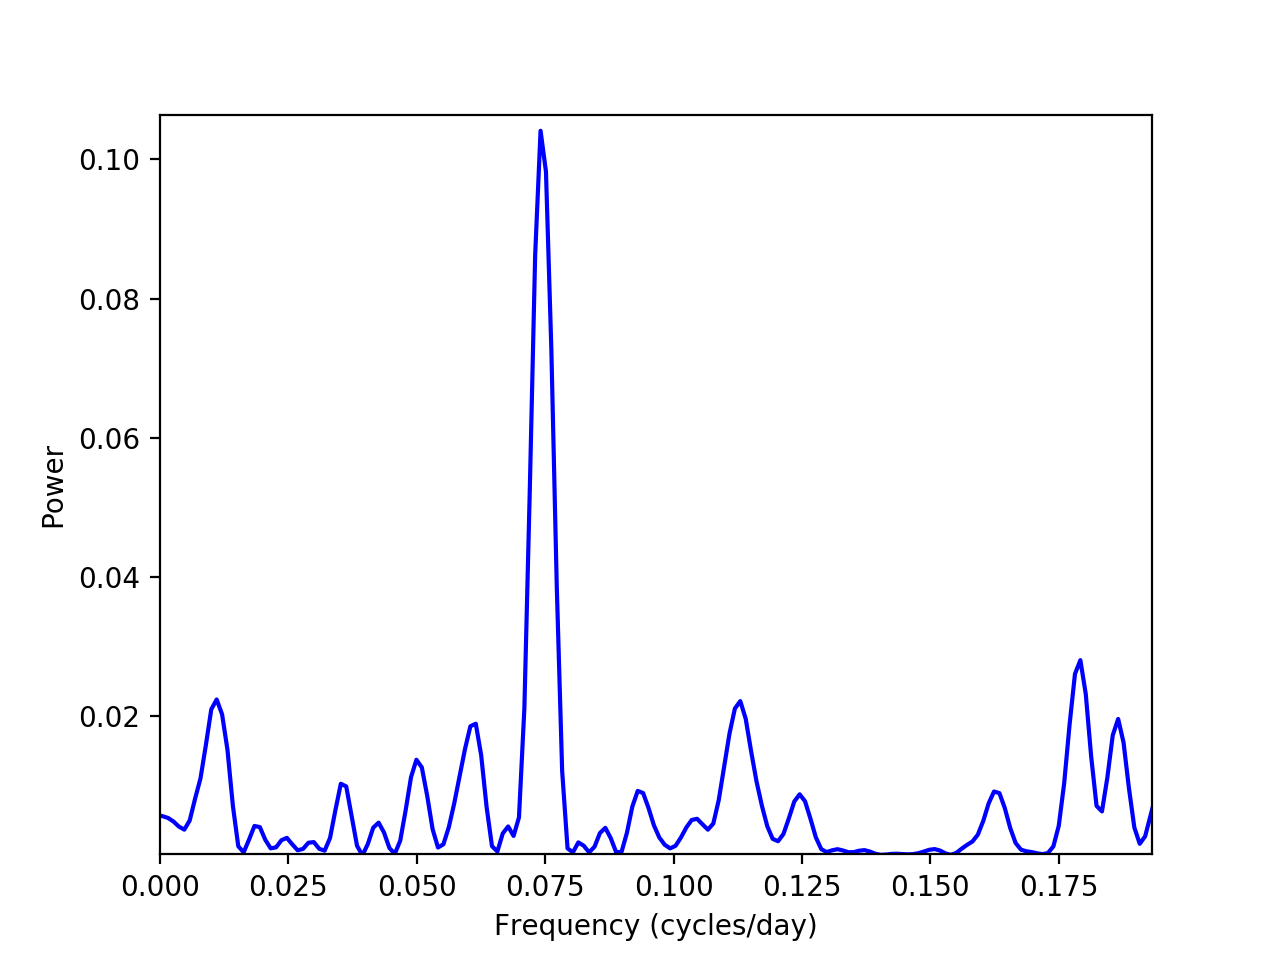

(0, 40)

In [15]:
%matplotlib notebook
from astropy.stats import LombScargle
frequency, power = LombScargle(np.array(mediantimelist),86400*(np.array(periodlist)-np.mean(periodlist))).autopower()
plt.clf()
plt.plot(frequency,power,c='blue')
plt.xlabel('Frequency (cycles/day)')
plt.ylabel('Power')
plt.xlim([0,40])